# Machine Learning 

## Installing and Importing Packages

In [1]:
!pip install -U scikit-learn
!pip install -U matplotlib

Requirement already up-to-date: scikit-learn in c:\users\hongk\anaconda3\lib\site-packages (0.20.3)
Requirement already up-to-date: matplotlib in c:\users\hongk\anaconda3\lib\site-packages (3.0.3)


import sys, os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import types
import pandas as pd

## Loading in the Data

In [17]:
df_data_1 = pd.read_csv("df_train.csv")
df_data_1.head()

,signal_id,id_measurement,phase,target,mean,max,min,std,Amp0,Pha0,Amp1,Pha1,Amp2,Pha2,Amp3,Pha3,Amp4,Pha4,ErrFun,ErrGen
0,0,0,0,0,-0.955625,33,-39,13.875082,7645.0,3.141593,77646.997989,0.565379,312.482475,-0.220529,555.905375,-0.142607,725.516282,-0.031373,2.027288,1.077001
1,1,0,1,0,-0.194250,26,-30,13.040534,1554.0,3.141593,72982.097221,-1.524697,238.348502,2.825956,653.633666,-2.782895,879.208223,-2.285654,1.898931,1.030193
2,2,0,2,0,-0.053000,39,-28,13.683245,424.0,3.141593,76638.532646,2.683598,50.933339,-2.321062,337.296314,2.089102,674.694524,1.896273,1.919745,1.068946
3,3,1,0,1,-0.995500,52,-77,13.669875,7964.0,3.141593,76936.076004,-2.398836,38.728609,-3.066331,254.582152,-2.665527,295.647834,-2.260187,1.375404,0.951130
4,4,1,1,1,-0.157625,33,-40,12.944276,1261.0,3.141593,72845.386093,1.793845,60.280461,1.176265,393.890115,1.371384,261.512972,1.711504,1.314423,0.857353


## Formatting the Data

In [4]:
df_data_features_labels = df_data_1.loc[:,["signal_id", "id_measurement", "target", "Amp0","Pha0", "Amp1", "Pha1", "Amp2", "Pha2", "Amp3", "Pha3", "Amp4", "Pha4", "ErrFun", "ErrGen"]]

In [5]:
df_data_features_labels.head(5)

,signal_id,id_measurement,target,Amp0,Pha0,Amp1,Pha1,Amp2,Pha2,Amp3,Pha3,Amp4,Pha4,ErrFun,ErrGen
0,0,0,0,7645.0,3.141593,77646.997989,0.565379,312.482475,-0.220529,555.905375,-0.142607,725.516282,-0.031373,2.027288,1.077001
1,1,0,0,1554.0,3.141593,72982.097221,-1.524697,238.348502,2.825956,653.633666,-2.782895,879.208223,-2.285654,1.898931,1.030193
2,2,0,0,424.0,3.141593,76638.532646,2.683598,50.933339,-2.321062,337.296314,2.089102,674.694524,1.896273,1.919745,1.068946
3,3,1,1,7964.0,3.141593,76936.076004,-2.398836,38.728609,-3.066331,254.582152,-2.665527,295.647834,-2.260187,1.375404,0.951130
4,4,1,1,1261.0,3.141593,72845.386093,1.793845,60.280461,1.176265,393.890115,1.371384,261.512972,1.711504,1.314423,0.857353


### Performing PCA (Principal Components Analysis)

We will perform PCA to find out what the most relevant features for predicting partial discharges/faults are.

In [6]:
df_data_features = df_data_features_labels.iloc[:,2:]
scaled_data = preprocessing.scale(df_data_features.T)
pca = PCA()
pca.fit(scaled_data) 
pca_data = pca.transform(scaled_data)

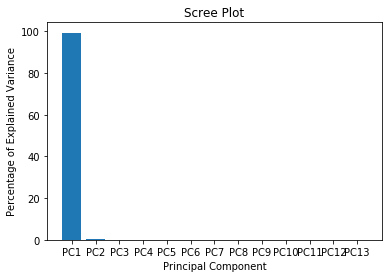

In [7]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

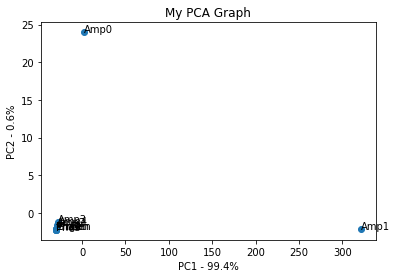

In [8]:
pca_df = pd.DataFrame(pca_data, index=df_data_features.columns, columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [9]:
loading_scores = pd.Series(pca.components_[0])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores[0:10].index.values

array([5652, 3051, 7482, 4911, 8067, 1434, 2097, 2613, 8514, 5982],
      dtype=int64)

## Feature Engineering 

Based on the results of PCA, we will select the most relevant features to build our predictive model.

In [10]:
df_signals_relevant_features_labels = df_data_features_labels.loc[:,["signal_id","id_measurement", "target", "Amp0", "Amp1"]]
X, y = df_signals_relevant_features_labels.loc[:,["Amp0", "Amp1"]], df_signals_relevant_features_labels.loc[:,["target"]]
X, y = X.as_matrix(), y.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\hongk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Model Building

Let's build, train, and test our k-nearest neighbor model. We'll tune the  number of neighbors hyperparameter and compare the prediction accuracy values.

In [11]:
# Select Model
knn_model_1 = KNeighborsClassifier(n_neighbors=100)

# Train the model using the training sets
knn_model_1.fit(X_train,y_train)

# Predict Output
y_predictions_1 = knn_model_1.predict(X_test)
accuracy_1 = metrics.accuracy_score(y_test, y_predictions_1)

print("Accuracy:", accuracy_1)

Accuracy: 0.9391853126792886


C:\Users\hongk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [12]:
# Select Model
knn_model_2 = KNeighborsClassifier(n_neighbors=500)

# Train the model using the training sets
knn_model_2.fit(X_train,y_train)

# Predict Output
y_predictions_2 = knn_model_2.predict(X_test)
accuracy_2 = metrics.accuracy_score(y_test, y_predictions_2)

print("Accuracy:", accuracy_2)

C:\Users\hongk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy: 0.9391853126792886


In [14]:
# Select Model
knn_model_3 = KNeighborsClassifier(n_neighbors=1000)

# Train the model using the training sets
knn_model_3 = knn_model_3.fit(X_train,y_train)

# Predict Output
y_predictions_3 = knn_model_3.predict(X_test)
accuracy_3 = metrics.accuracy_score(y_test, y_predictions_3)

print("Accuracy:", accuracy_3)

C:\Users\hongk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy: 0.9391853126792886


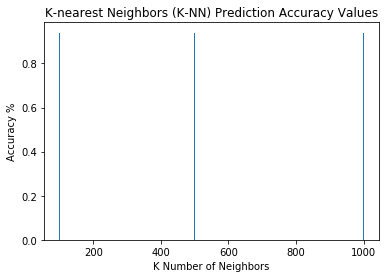

In [15]:
plt.bar(x=[100, 500, 1000], height=[accuracy_1, accuracy_2, accuracy_3])
plt.ylabel("Accuracy %")
plt.xlabel("K Number of Neighbors")
plt.title("K-nearest Neighbors (K-NN) Prediction Accuracy Values")
plt.show()

## In conclusion, we have used the k-nearest neighbor machine learning algorithm in order to achieve 94% prediction accuracy of partial discharge/faults in power grid systems. 